In [6]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.display import display
from collections import OrderedDict

import glob
import ipyparallel as ipp
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

import MESS

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get all the empirical classifiers and regressors

In [75]:
## Directory where the empirical results live
emp_base_dir = "/home/iovercast/Continuosity/MESS/jupyter-notebooks/empirical/"
snail_dir = emp_base_dir + "Galapagos_snails/"
spider_dir = emp_base_dir + "Reunion_spider/"
weevil_dir = emp_base_dir + "Mascarene_weevils/"
trees_dir = emp_base_dir + "Australian_trees/"

emp_plot_order = ["Mauritius_weevils",
                    "Reunion_weevils",
                    "Reunion_spiders",
                    "Dorrigo_trees",
                    "Nightcap_trees",
                    "Washpool_trees",
                    "Isabela_snails",
                    "San_Cristobal_snails",
                    "Santa_Cruz_snails"]

emp_dirs = {"Mauritius_weevils":weevil_dir + "Mauritius/",
            "Reunion_weevils":weevil_dir + "Reunion/",
            "Reunion_spiders":spider_dir + "Reunion/",
            "Dorrigo_trees":trees_dir + "Dorrigo/",
            "Nightcap_trees":trees_dir + "Nightcap/",
            "Washpool_trees":trees_dir + "Washpool/",
            "Isabela_snails":snail_dir + "Isabela/",
            "San_Cristobal_snails":snail_dir + "San_Cristobal/",
            "Santa_Cruz_snails":snail_dir + "Santa_Cruz/"}

classifiers = {x:emp_dirs[x] + x.rsplit("_", 1)[0] + "_classifier.mdl" for x in emp_dirs}
regressors = {x:emp_dirs[x] + x.rsplit("_", 1)[0] + "_regressor.mdl" for x in emp_dirs}
emp_df = pd.DataFrame(emp_dirs.values(), index=emp_dirs.keys(), columns=["root_dir"])
emp_df["classifiers"] = pd.Series(classifiers)
emp_df["regressors"] = pd.Series(regressors)
emp_df = emp_df.reindex(emp_plot_order)

## Ensure all the empirical results are present
print("Classifiers present:")
display(emp_df["classifiers"].map(os.path.exists))

print("Regressors present:")
display(emp_df["regressors"].map(os.path.exists))

Classifiers present:


Mauritius_weevils       True
Reunion_weevils         True
Reunion_spiders         True
Dorrigo_trees           True
Nightcap_trees          True
Washpool_trees          True
Isabela_snails          True
San_Cristobal_snails    True
Santa_Cruz_snails       True
Name: classifiers, dtype: bool

Regressors present:


Mauritius_weevils       True
Reunion_weevils         True
Reunion_spiders         True
Dorrigo_trees           True
Nightcap_trees          True
Washpool_trees          True
Isabela_snails          True
San_Cristobal_snails    True
Santa_Cruz_snails       True
Name: regressors, dtype: bool

## Load up the trained Classifier and pull out the predictions

In [68]:
cla_preds_df = pd.DataFrame()
for name in emp_df.index:
    print(name)
    try:
        cla = MESS.inference.Ensemble.load(emp_df["classifiers"][name])
        cla_pred = cla.empirical_proba
        cla_pred.index = [name]
        cla_preds_df = pd.concat([cla_preds_df, cla_pred])
    except IOError:
        print("classifier does not exist: {}".format(name))

cla_preds_df

Mauritius_weevils
Reunion_weevils
Reunion_spiders
Dorrigo_trees
Nightcap_trees
Washpool_trees
Isabela_snails
San_Cristobal_snails
Santa_Cruz_snails


,competition,filtering,neutral
Mauritius_weevils,0.313155,0.120736,0.566109
Reunion_weevils,0.336089,0.099968,0.563943
Reunion_spiders,0.023767,0.037025,0.939209
Dorrigo_trees,0.180326,0.454014,0.365660
Nightcap_trees,0.201309,0.418113,0.380578
Washpool_trees,0.180246,0.448433,0.371321
Isabela_snails,0.099552,0.620173,0.280276
San_Cristobal_snails,0.163714,0.748804,0.087482
Santa_Cruz_snails,0.146669,0.726010,0.127321


## Plot classification probabilities

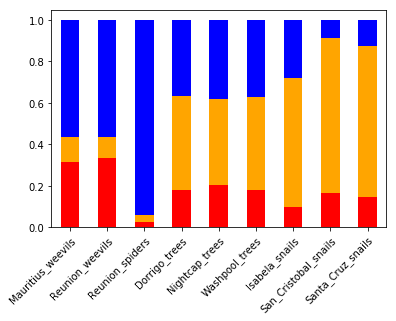

In [69]:
ax = cla_preds_df.plot.bar(stacked=True, legend=False, color=['r', 'orange', 'b'])
_ = plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")

## Get estimates and prediction intervals for all the synthetic communities

In [76]:
rgr_preds = OrderedDict()

for name in emp_df.index:
    print(name)
    try:
        rgr = MESS.inference.Ensemble.load(emp_df["regressors"][name])
        rgr_preds[name] = rgr.empirical_pred
    except IOError:
        print("Regressor does not exist: {}".format(name))

for name in rgr_preds:
    print(name)
    display(rgr_preds[name])

Mauritius_weevils
Reunion_weevils
Reunion_spiders
Dorrigo_trees
Nightcap_trees
Washpool_trees
Isabela_snails
San_Cristobal_snails
Santa_Cruz_snails
Mauritius_weevils


,alpha,ecological_strength,m,generation,speciation_prob,_lambda
estimate,7107.251038,0.390940,0.007028,1259.572400,0.002600,0.933514
lower 0.025,3496.731182,0.001662,0.002072,402.724946,0.000599,0.804230
upper 0.975,9831.388833,0.995216,0.009649,3590.324978,0.004940,1.000000


Reunion_weevils


,alpha,ecological_strength,m,generation,speciation_prob,_lambda
estimate,7178.213886,0.415004,0.007028,1259.572400,0.002689,0.929886
lower 0.025,3506.795296,0.001670,0.002072,402.724946,0.000588,0.802309
upper 0.975,9823.660937,0.996648,0.009649,3590.324978,0.004940,1.000000


Reunion_spiders


,alpha,ecological_strength,J,m,generation,speciation_prob,_lambda
estimate,8346.363032,0.197306,5805.876065,0.003211,815.667319,0.000753,0.896258
lower 0.025,6170.016148,0.001180,2938.192790,0.001060,294.267739,0.000510,0.819465
upper 0.975,9951.414497,0.915339,8645.222566,0.008616,2011.484095,0.001400,0.997267


Dorrigo_trees


,alpha,ecological_strength,J,m,generation,speciation_prob,_lambda
estimate,1471.570923,0.103452,4321.267030,0.006778,29.392431,0.002687,0.391606
lower 0.025,1014.132797,0.001090,1692.138415,0.003970,2.000000,0.000628,0.064552
upper 0.975,2534.126747,0.626243,8559.266829,0.009520,123.355048,0.004800,0.975441


Nightcap_trees


,alpha,ecological_strength,J,m,generation,speciation_prob,_lambda
estimate,1461.403779,0.168662,5041.298588,0.002673,19.350557,0.002941,0.368745
lower 0.025,1018.531872,0.001119,1800.321878,0.001120,1.413703,0.000673,0.051929
upper 0.975,2565.095688,0.908465,9471.000000,0.004130,62.517442,0.004800,0.974337


Washpool_trees


,alpha,ecological_strength,J,m,generation,speciation_prob,_lambda
estimate,1336.431515,0.237484,4228.870236,0.006778,20.170973,0.002996,0.398087
lower 0.025,1024.434086,0.001141,1681.512336,0.003970,1.345834,0.000660,0.013510
upper 0.975,2343.980772,0.943878,8466.624746,0.009520,64.992719,0.004800,0.973208


Isabela_snails


,alpha,ecological_strength,J,m,generation,speciation_prob,_lambda
estimate,8052.669362,0.221471,1483.904861,0.002038,860.836241,0.000979,0.586183
lower 0.025,4340.775934,0.001274,1017.000000,0.001020,98.345685,0.000510,0.087941
upper 0.975,9956.873770,0.928921,2023.000000,0.006961,1969.256525,0.002540,0.915954


San_Cristobal_snails


,alpha,ecological_strength,J,m,generation,speciation_prob,_lambda
estimate,7601.567679,0.252392,1495.545139,0.002115,894.717983,0.000992,0.581202
lower 0.025,2907.478552,0.001360,1017.000000,0.001020,80.005381,0.000520,0.113812
upper 0.975,9949.000000,0.983150,2023.000000,0.006566,2305.386935,0.002866,0.934725


Santa_Cruz_snails


,alpha,ecological_strength,J,m,generation,speciation_prob,_lambda
estimate,8006.793884,0.219908,1280.2,0.002427,1019.654744,0.000923,0.617893
lower 0.025,4267.322749,0.001344,1017.0,0.001070,128.763399,0.000520,0.124529
upper 0.975,9952.242533,0.928675,1704.0,0.008919,2293.008967,0.002510,0.938104


## Figure out how to do the gd plot

In [94]:
colors = cmap=plt.get_cmap("tab10").colors[:len(rgr_preds)+1]
colors

((0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529))

(9, ((0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (1.0, 0.4980392156862745, 0.054901960784313725), (0.17254901960784313, 0.6274509803921569, 0.17254901960784313), (0.8392156862745098, 0.15294117647058825, 0.1568627450980392), (0.5803921568627451, 0.403921568627451, 0.7411764705882353), (0.5490196078431373, 0.33725490196078434, 0.29411764705882354), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902), (0.4980392156862745, 0.4980392156862745, 0.4980392156862745), (0.7372549019607844, 0.7411764705882353, 0.13333333333333333), (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)))


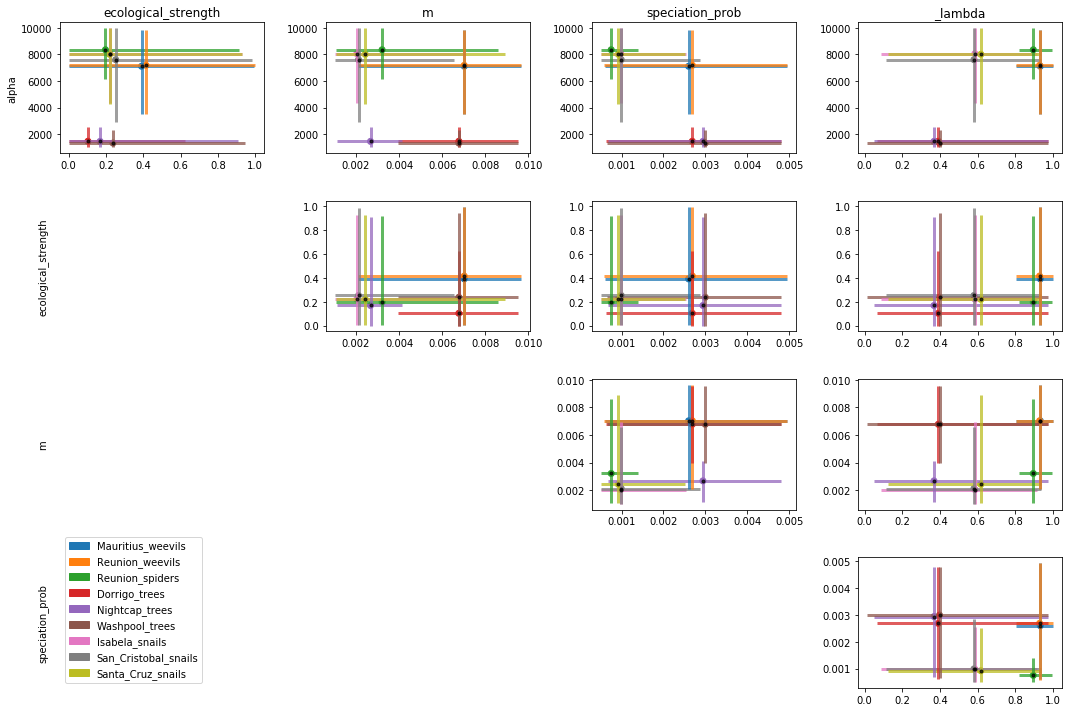

In [95]:
## Minus 1 because we don't do pairwise comparisons within parameters
## Real data
n_targets = len(rgr_preds[rgr_preds.keys()[0]].columns) - 1
targets = rgr.targets

## Probably used for the manu
targets = ["alpha", "ecological_strength", "m", "speciation_prob", "_lambda"]
n_targets = len(targets) - 1

## Small for testing
#n_targets=3
#targets = ["alpha", "ecological_strength", "J", "m"]

offset = 1
colors = plt.get_cmap("tab10").colors[:len(rgr_preds)+1]

fig, axs = plt.subplots(n_targets, n_targets, figsize=(15, 10))#, sharey=True)
for ridx, t1 in enumerate(targets[:-1]):
    
    axs[ridx][0].set_ylabel("{}".format(t1))

    ## Hide the ticks, labels, and spines of the axes we aren't plotting to.
    ## There's probably a cleaner way to do this. We could use ax.axis('off'),
    ## but the problem is we want to retain the ylabel, so we have to shut off
    ## everything but the ylabel by hand.
    for cidx, _ in enumerate(targets[:ridx]):
        ##print("Hide axis: {} {}".format(ridx, cidx))
        axs[ridx][cidx].set_yticklabels([])
        axs[ridx][cidx].set_xticklabels([])
        axs[ridx][cidx].tick_params(top='off', bottom='off', left='off', right='off')
        axs[ridx][cidx].spines['right'].set_visible(False)
        axs[ridx][cidx].spines['top'].set_visible(False)
        axs[ridx][cidx].spines['bottom'].set_visible(False)
        axs[ridx][cidx].spines['left'].set_visible(False)

    for cidx, t2 in enumerate(targets[ridx+1:]):
        if ridx == 0:
            axs[ridx][cidx+ridx].set_title("{}".format(t2))

        ## Error bars are not absolute values they are +/- wrt to the xy coord
        x = np.array([rgr_preds[v][t2]["estimate"] for v in rgr_preds])
        y = np.array([rgr_preds[v][t1]["estimate"] for v in rgr_preds])
        x_low = x - np.array([rgr_preds[v][t2]["lower 0.025"] for v in rgr_preds])
        x_high = np.array([rgr_preds[v][t2]["upper 0.975"] for v in rgr_preds]) - x
        y_low = y - np.array([rgr_preds[v][t1]["lower 0.025"] for v in rgr_preds])
        y_high = np.array([rgr_preds[v][t1]["upper 0.975"] for v in rgr_preds]) - y
        axs[ridx][cidx+ridx].errorbar(x, y, yerr=[y_low, y_high], xerr=[x_low, x_high], color='black',\
                                      ecolor=colors, fmt='.', linewidth=3, alpha=.75)
        axs[ridx][cidx+ridx].scatter(x, y, color=colors, marker='o')

import matplotlib.patches as mpatches
patches = [mpatches.Patch(color=colors[x], label=rgr_preds.keys()[x]) for x in range(len(rgr_preds))]
axs[-1][0].legend(handles=patches, loc='lower left')
plt.tight_layout()
